In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
# generates a tophat function

def top_hat():
    t_hat = np.zeros(64)
    for i in range(0, 64):
        z = 16.**2 - (i-32.)**2
        if z > 0:
            t_hat[i] = 2*np.sqrt(z)
    return t_hat


In [3]:
# Ramachandran- Lakshminarayanan filter for back projection

def ramac_filter(p):
    p_star = np.zeros(64)
    
    for i in range(0,64):
        q = p[i] * 2.467401
        Jc = 1 + i%2
        for j in range(Jc,64,2):
            q = q -p[j] / (i-j)**2
        p_star[i] = q/(np.pi * 0.3333 * 50)
    return p_star

In [4]:
#  does the back projection on the output from Ramac_filter

def back_proj(y, phi):
    image = np.zeros((64*64))
   
    for j in range(0,64):
        i_min = (j+1) * 64 - 32 - np.floor(np.sqrt(1024 - (32-j)**2))
        i_max = (2*j+1) * 64 - i_min + 1
        x = 31 + (32 - j) * np.sin(phi) + (i_min - (j+1)*64 + 31) * np.cos(phi)

        for i in range(np.int(i_min), np.int(i_max)):
            x = x + np.cos(phi)
            ix = np.int(x)
            image[i] = image[i] + y[ix] + (x-ix)*(y[ix+1] - y[ix])
    
    f = np.zeros((64,64))
    for i in range(0,64):
        for j in range(0,64):
            f[i,j] = image[64*(i)+j]
    return f

In [5]:
# calculation using functions

y = ramac_filter(top_hat())
I = np.zeros((64,64))

for ii in range(1, 32):
    phi = ii * 0.1
    z = back_proj(y, phi)
    I = I + z



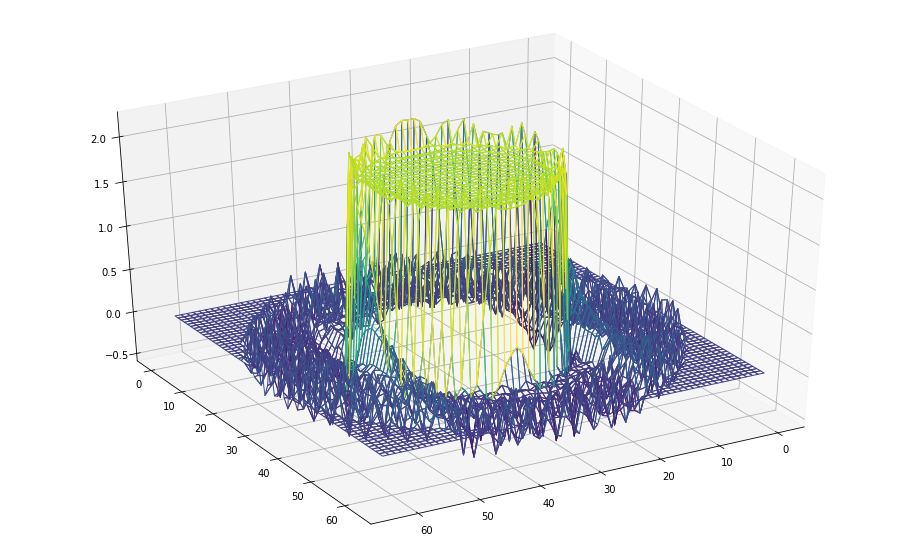

In [6]:
# plot calculated I 

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

# set viewing angle
ax.view_init(35, 60)


# Grab data
X,Y = np.meshgrid(np.arange(0, 64),np.arange(0, 64))
Z = I


# Normalizing to [0,1] for colour
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape

# 3D surface plot
mesh = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
mesh.set_facecolor((0,0,0,0))
plt.show()






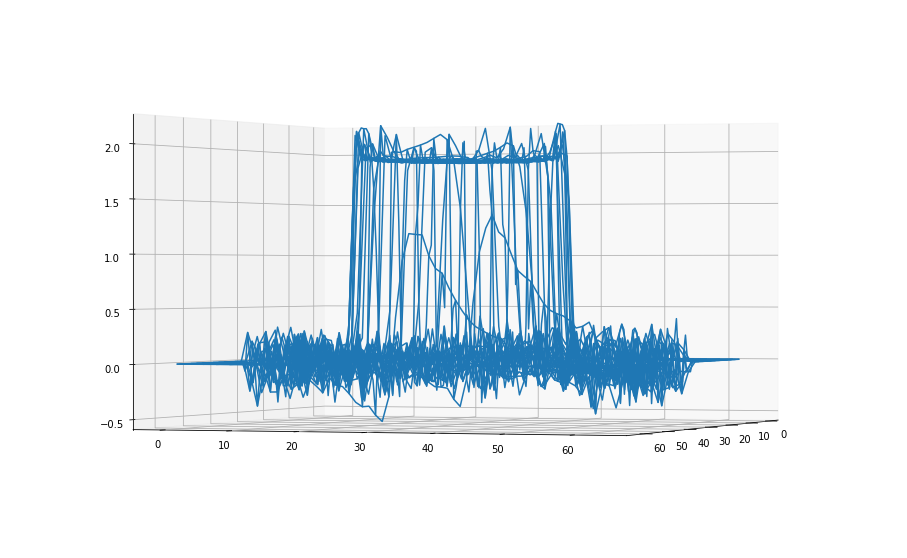

In [7]:
# plot calculated I, with different method

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
# set viewing angle
ax.view_init(0, 20)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)
plt.show()